## Projet – Prédiction du succès d’une campagne de télémarketing bancaire

Binôme : OUACHEM Leaticia , DBICHI Assia

Pour ce TP, nous allons travailler sur le jeu de données Bank Marketing provenant d'une banque portugaise, utilisé pour prédire si un client souscrira à un dépôt à terme suite à une campagne de télémarketing. L’objectif est de construire un pipeline de classification complet afin d’optimiser le ciblage des clients les plus susceptibles de souscrire.

## 1. **Chargement et aperçu des données** (collecte)

In [28]:
import numpy as np
import seaborn as sns

In [56]:
import pandas as pd
df=pd.read_csv("/amuhome/o22021702/Documents/bank-additional/bank-additional/bank-additional-full.csv")
#df_bankfull = pd.read_csv("/amuhome/o22021702/Documents/bank/bank-full.csv", sep=';')
#df_bank = pd.read_csv("/amuhome/o22021702/Documents/bank/bank.csv", sep=';')
print(df_bankfull.head())

   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  


In [30]:
df_bankfull.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [31]:
df_bankfull.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


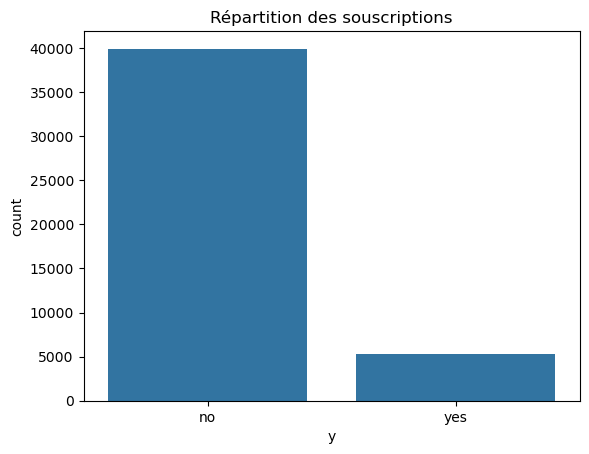

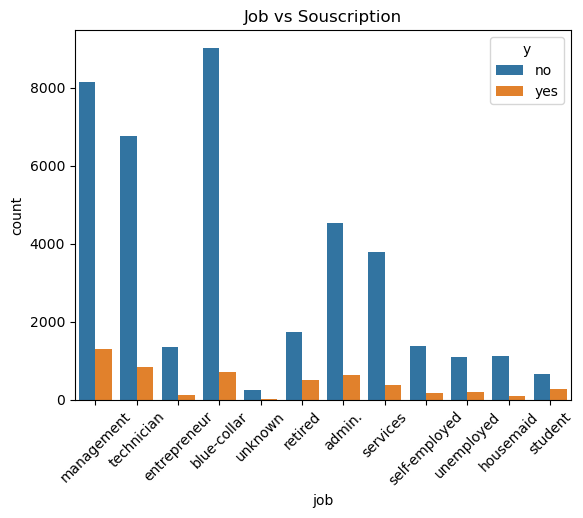

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Répartition de la cible
sns.countplot(x='y', data=df_bankfull)
plt.title("Répartition des souscriptions")
plt.show()

# Exemple pour une variable catégorielle
sns.countplot(x='job', hue='y', data=df_bankfull)
plt.xticks(rotation=45)
plt.title("Job vs Souscription")
plt.show()


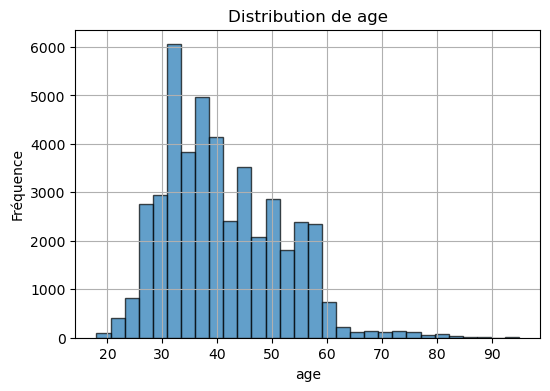

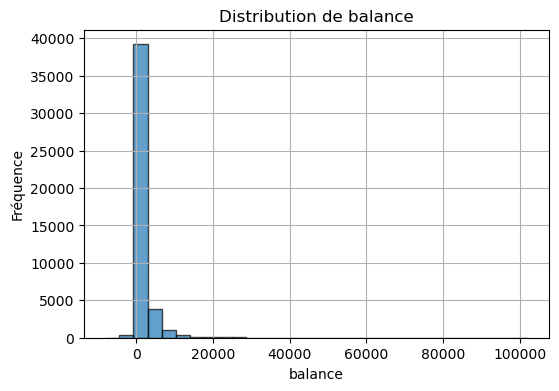

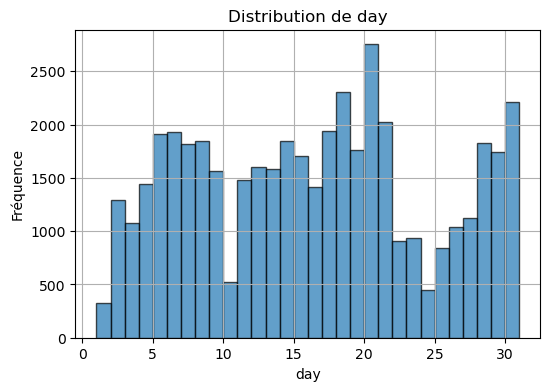

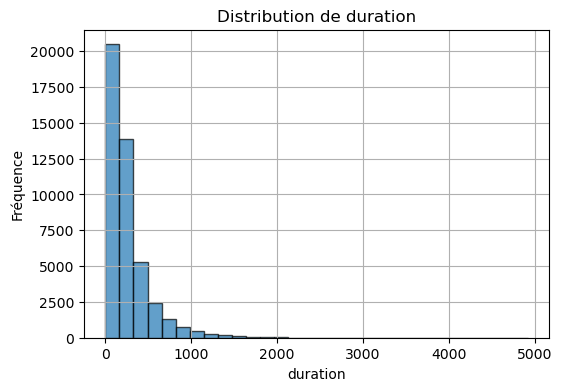

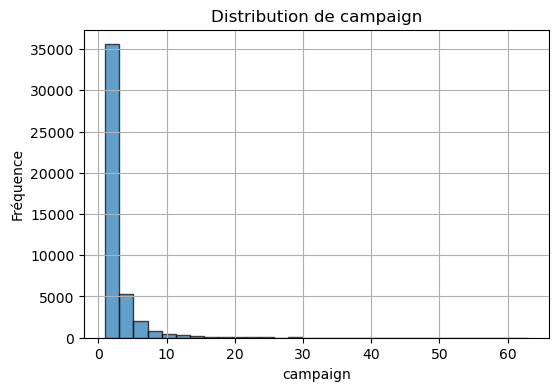

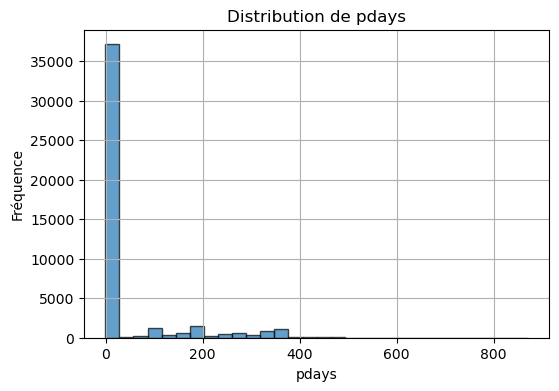

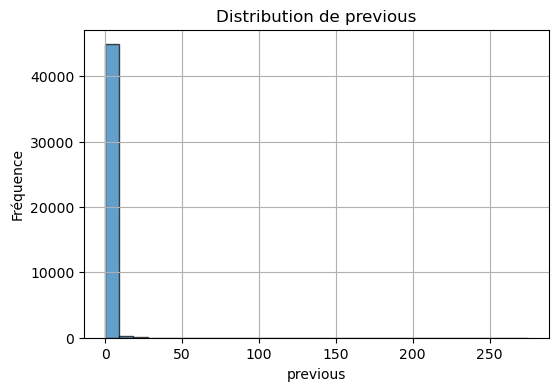

In [33]:
import matplotlib.pyplot as plt

# Sélectionner uniquement les colonnes numériques
num_cols = df_bankfull.select_dtypes(include=['int64', 'float64']).columns

# Boucle sur chaque variable et trace un histogramme
for col in num_cols:
    plt.figure(figsize=(6, 4))
    plt.hist(df_bankfull[col].dropna(), bins=30, edgecolor='black', alpha=0.7)
    plt.title(f"Distribution de {col}")
    plt.xlabel(col)
    plt.ylabel("Fréquence")
    plt.grid(True)
    plt.show()


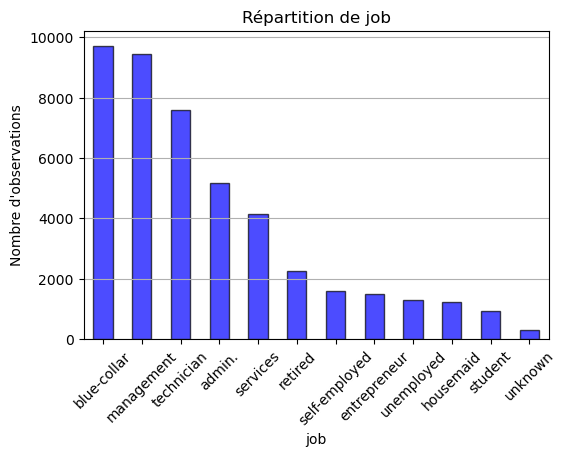

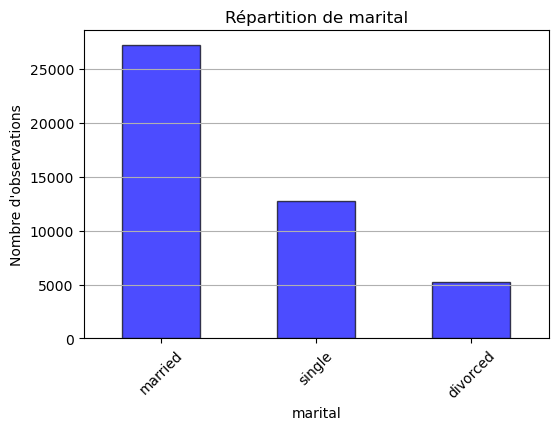

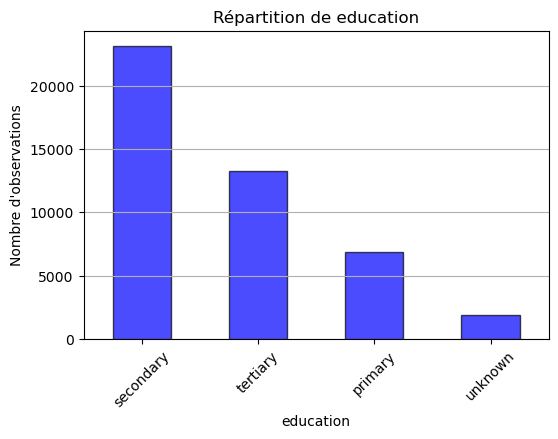

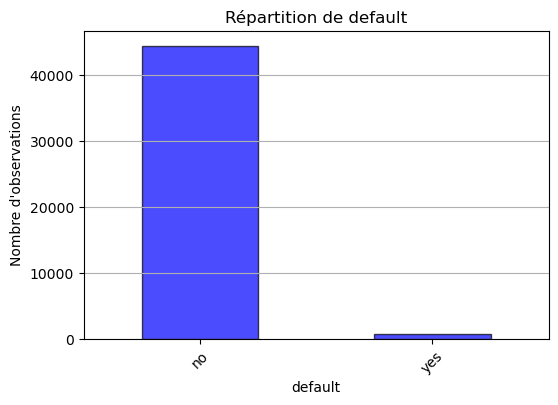

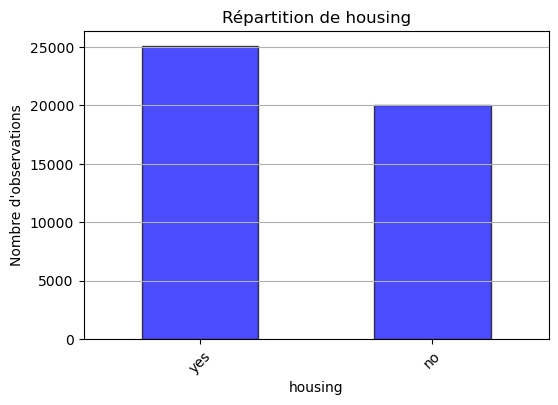

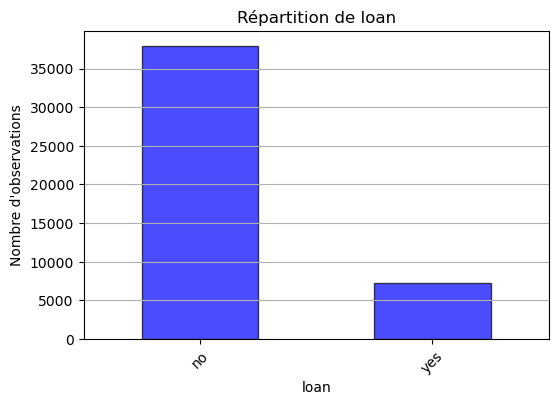

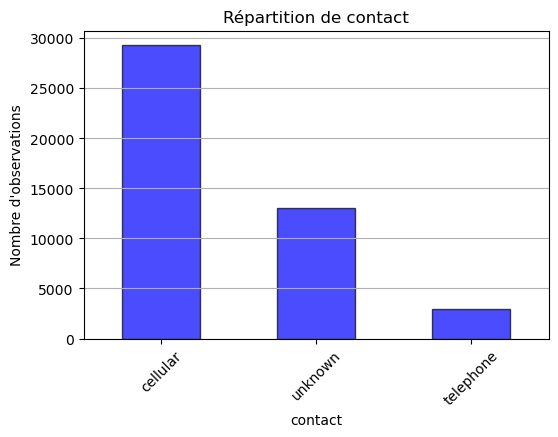

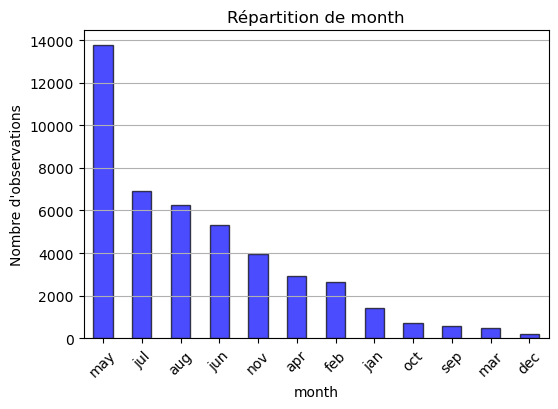

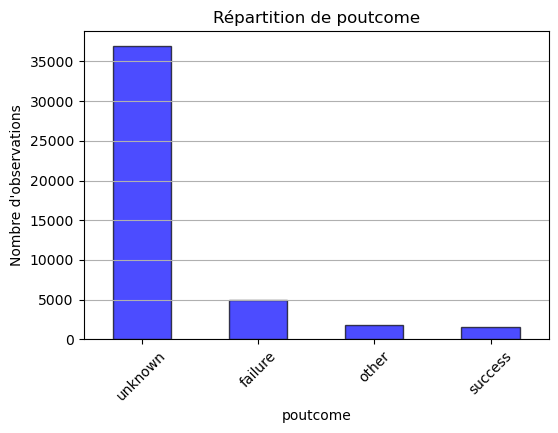

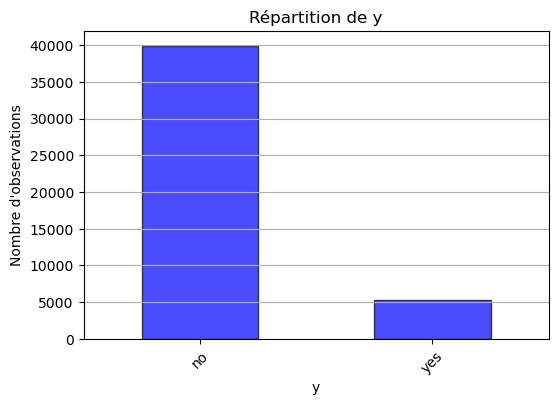

In [34]:
# Sélectionner uniquement les variables catégorielles
cat_cols = df_bankfull.select_dtypes(include=['object', 'category']).columns

# Boucle pour afficher chaque variable catégorielle
for col in cat_cols:
    plt.figure(figsize=(6, 4))
    df_bankfull[col].value_counts().plot(kind="bar", color="blue", edgecolor="black", alpha=0.7)
    plt.title(f"Répartition de {col}")
    plt.xlabel(col)
    plt.ylabel("Nombre d'observations")
    plt.xticks(rotation=45)  # Rotation des labels pour lisibilité
    plt.grid(axis="y")
    plt.show()


In [35]:
from scipy.stats import kstest

stat, p = kstest(df_bankfull['previous'], 'norm')
print(f"P-value : {p}")

if p > 0.05:
    print("Distribution normale")
else:
    print("Distribution non normale")


P-value : 0.0
Distribution non normale


Donc notre distribution est déséquilibrée.


## 2. **Nettoyage**

Valeurs manquantes

In [36]:
print(df_bankfull.isnull())

         age    job  marital  education  default  balance  housing   loan  \
0      False  False    False      False    False    False    False  False   
1      False  False    False      False    False    False    False  False   
2      False  False    False      False    False    False    False  False   
3      False  False    False      False    False    False    False  False   
4      False  False    False      False    False    False    False  False   
...      ...    ...      ...        ...      ...      ...      ...    ...   
45206  False  False    False      False    False    False    False  False   
45207  False  False    False      False    False    False    False  False   
45208  False  False    False      False    False    False    False  False   
45209  False  False    False      False    False    False    False  False   
45210  False  False    False      False    False    False    False  False   

       contact    day  month  duration  campaign  pdays  previous  poutcome

Valeurs aberrantes

In [49]:
for col in df_bankfull.select_dtypes(include="object").columns:
    print(f"{col}: {df_bankfull[col].unique()}")  # Lister les catégories uniques

job: ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
marital: ['married' 'single' 'divorced']
education: ['tertiary' 'secondary' 'unknown' 'primary']
default: ['no' 'yes']
housing: ['yes' 'no']
loan: ['no' 'yes']
contact: ['unknown' 'cellular' 'telephone']
month: ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
poutcome: ['unknown' 'failure' 'other' 'success']
y: ['no' 'yes']


In [37]:
df_bankfull.isnull().any().isnull()

age          False
job          False
marital      False
education    False
default      False
balance      False
housing      False
loan         False
contact      False
day          False
month        False
duration     False
campaign     False
pdays        False
previous     False
poutcome     False
y            False
dtype: bool

In [38]:
df_bankfull[df_bankfull.duplicated()]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y


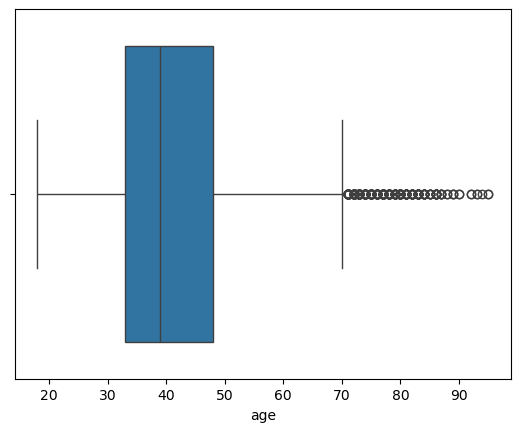

In [52]:
sns.boxplot(x=df_bankfull["age"])
plt.show()

In [53]:
from scipy import stats
z_scores = stats.zscore(df_bankfull[["age", "balance", "duration"]])
outliers = (abs(z_scores) > 3).any(axis=1) 
print(f"Nombre de valeurs aberrantes : {outliers.sum()}")


Nombre de valeurs aberrantes : 2052


In [39]:
import seaborn as sns
Q1 = df_bankfull['balance'].quantile(0.25)
Q3 = df_bankfull['balance'].quantile(0.75)
IQR = Q3 - Q1

outliers = df_bankfull[(df_bankfull['balance'] < Q1 - 1.5 * IQR) |
                       (df_bankfull['balance'] > Q3 + 1.5 * IQR)]

print(f"Nombre de valeurs aberrantes : {outliers.shape[0]}")



Nombre de valeurs aberrantes : 4729


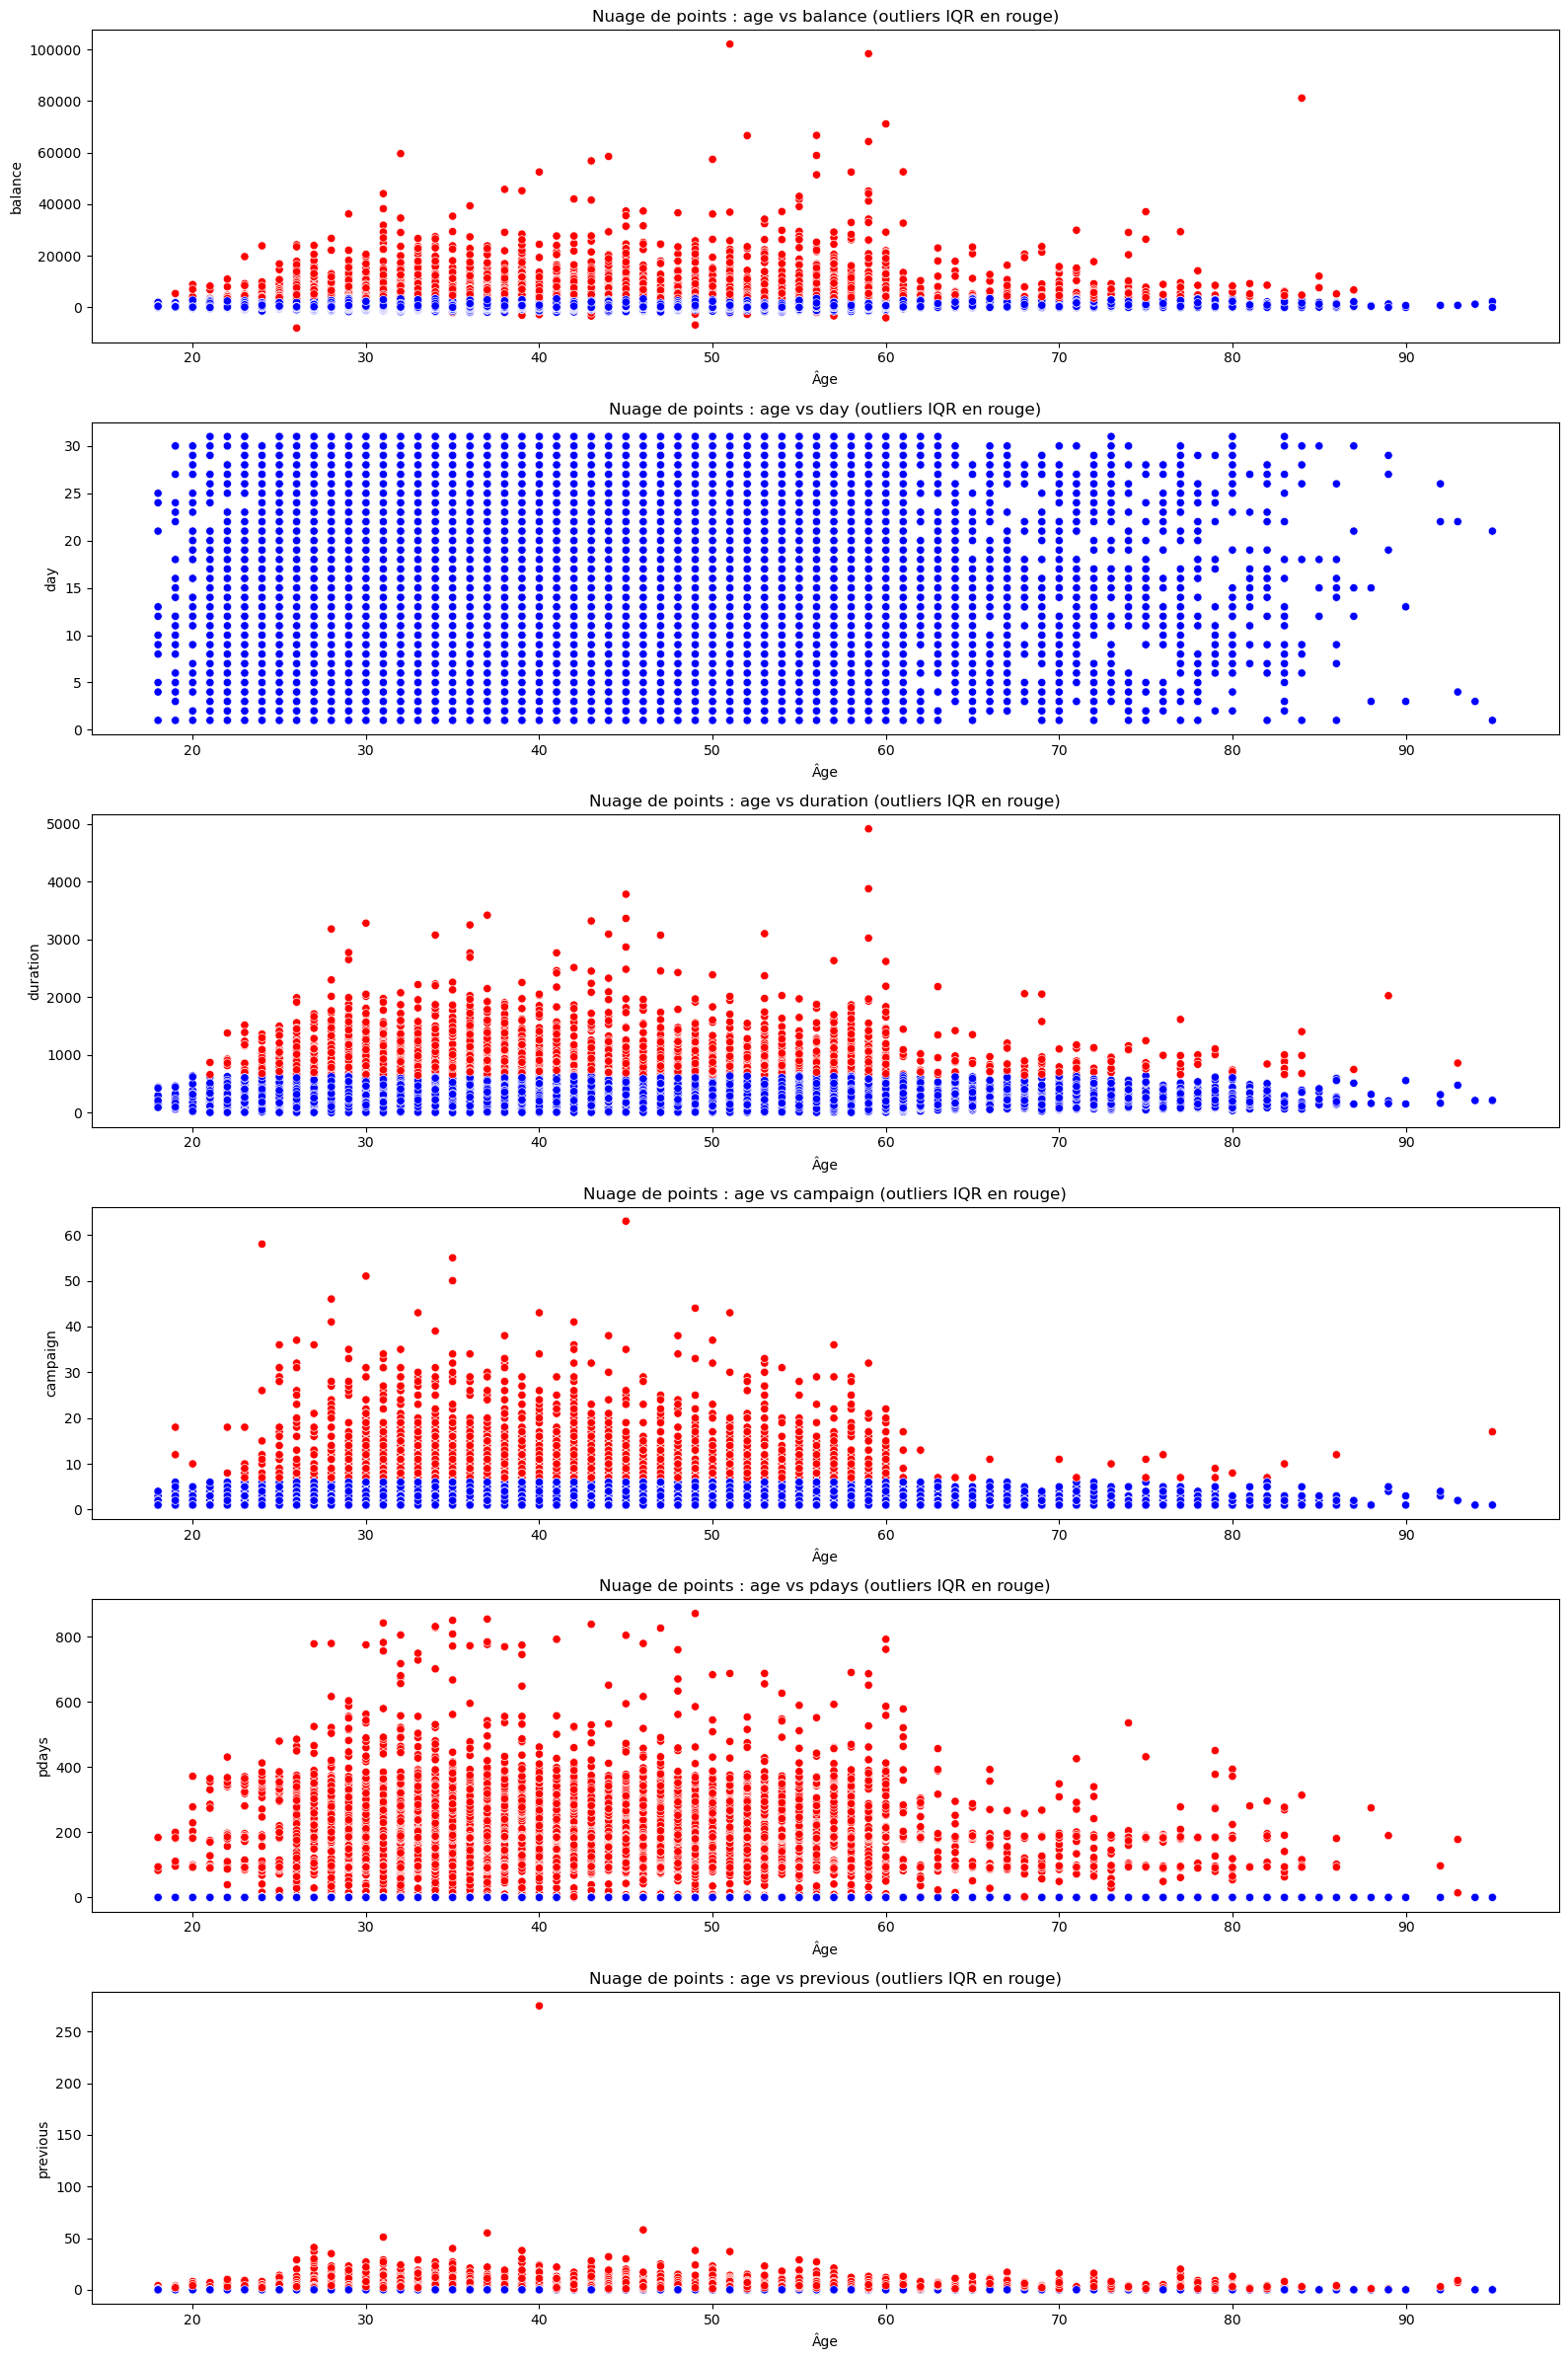

In [27]:
numeric_cols = df_bankfull.select_dtypes(include='number').columns
numeric_cols = numeric_cols.drop('age')  # on garde "age" en x

# Créer une figure avec plusieurs sous-graphiques
n = len(numeric_cols)
plt.figure(figsize=(16, 4 * n))

for i, col in enumerate(numeric_cols, 1):
    # Calcul de l'IQR
    Q1 = df_bankfull[col].quantile(0.25)
    Q3 = df_bankfull[col].quantile(0.75)
    IQR = Q3 - Q1

    # Détection des outliers pour la variable actuelle
    outliers = (df_bankfull[col] < Q1 - 1.5 * IQR) | (df_bankfull[col] > Q3 + 1.5 * IQR)

    # Sous-graphique
    plt.subplot(n, 1, i)
    sns.scatterplot(x=df_bankfull['age'], y=df_bankfull[col], hue=outliers,
                    palette={True: 'red', False: 'blue'}, legend=False)
    plt.title(f"Nuage de points : age vs {col} (outliers IQR en rouge)")
    plt.xlabel("Âge")
    plt.ylabel(col)

plt.tight_layout()


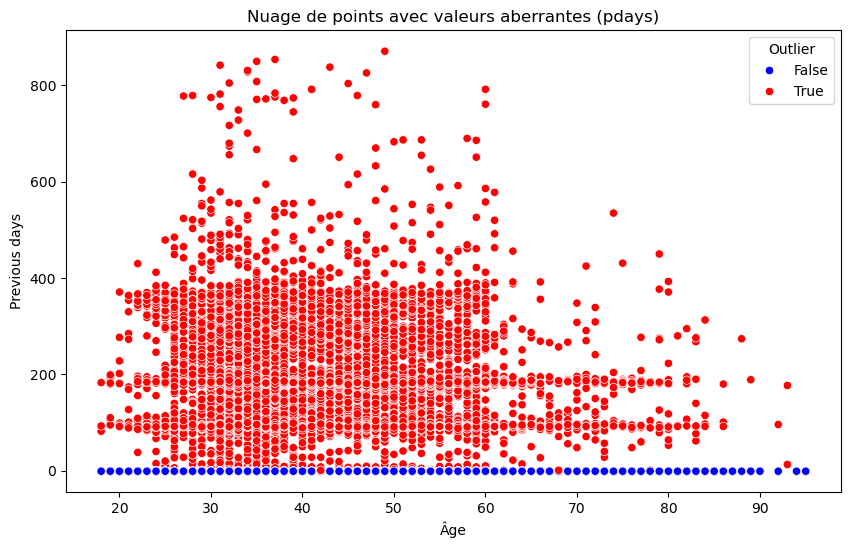

In [25]:
# Détection des outliers sur 'balance'
Q1 = df_bankfull['pdays'].quantile(0.25)
Q3 = df_bankfull['pdays'].quantile(0.75)
IQR = Q3 - Q1

# Marquage
df_bankfull['outlier_pdays'] = ((df_bankfull['pdays'] < Q1 - 1.5 * IQR) |
                                  (df_bankfull['pdays'] > Q3 + 1.5 * IQR))

# Affichage avec couleur selon outlier ou non
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_bankfull, x='age', y='pdays', hue='outlier_pdays', palette={True: 'red', False: 'blue'})
plt.title("Nuage de points avec valeurs aberrantes (pdays)")
plt.xlabel("Âge")
plt.ylabel("Previous days")
plt.legend(title="Outlier")
plt.show()

